# オートエンコーダ

In [2]:
import tensorflow.keras as keras
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
import numpy.random as random

In [3]:
data = keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = data

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [9]:
model = models.Sequential(
    [
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(32, activation="relu"),
        layers.Dense(784, activation="sigmoid"),
        layers.Reshape((28, 28)),
    ],
    name="AutoEncoder",
)
model.compile(
    optimizer="adam", loss="bce", metrics=["accuracy"]
)

In [10]:
model.fit(x_train, x_train, epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 913us/step - accuracy: 0.1566 - loss: 0.2230
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 889us/step - accuracy: 0.2673 - loss: 0.1086
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 835us/step - accuracy: 0.2782 - loss: 0.0975
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 834us/step - accuracy: 0.2798 - loss: 0.0954
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 891us/step - accuracy: 0.2819 - loss: 0.0946
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2823 - loss: 0.0944
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 883us/step - accuracy: 0.2830 - loss: 0.0941
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 834us/step - accuracy: 0.2829 - loss: 0.0938
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 884us/step - accuracy: 0.2826 - loss: 0.0938
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 868us/step - accuracy: 0.2835 - loss: 0.0936


In [11]:
pred_x = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step


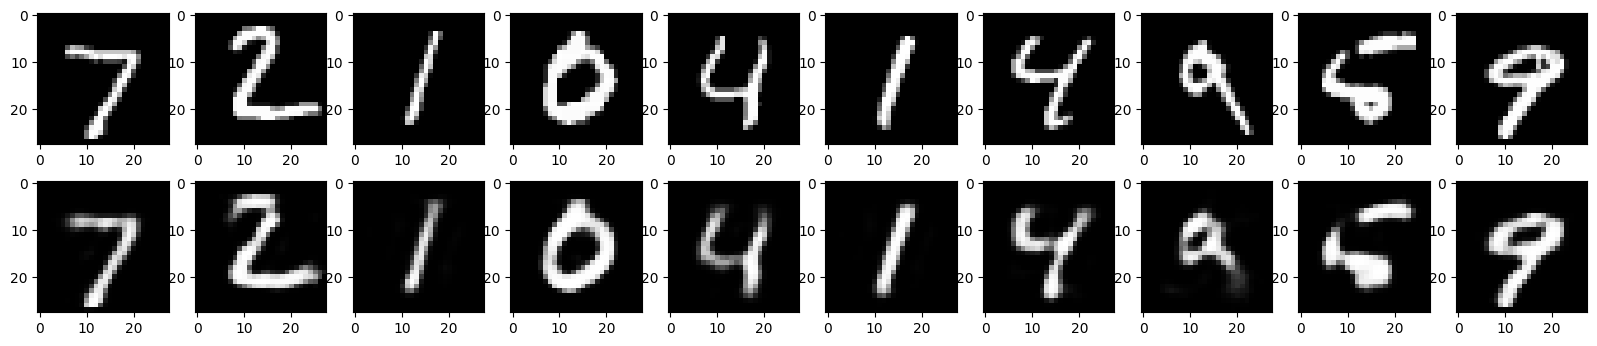

In [12]:
fig, axs = plt.subplots(2, 10, figsize=(20, 4))

for i in range(10):
    axs[0, i].imshow(x_test[i], cmap="gray")
    axs[1, i].imshow(pred_x[i], cmap="gray")


In [13]:
encoder = models.Sequential(
    [
        layers.Flatten(input_shape=(28, 28)),
        model.layers[1],
    ],
    name="Encoder",
)

decoder = models.Sequential(
    [
        model.layers[2],
        layers.Reshape((28, 28)),
    ],
    name="Decoder",
)

In [14]:
potential_z = encoder.predict(x_test)
pred_x = decoder.predict(potential_z)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step


In [15]:
potential_z[0]

array([ 3.7398753,  6.0837297,  2.663003 ,  5.3468447,  3.6931913,
       11.713177 ,  7.978866 ,  0.509092 , 15.363115 ,  4.2608376,
        2.4411173,  5.1467166,  9.351221 ,  3.9387143,  2.7901824,
        3.0996375,  9.4659   ,  6.4117775,  6.369586 ,  3.799424 ,
        3.3410075,  5.6269403,  6.6399336,  7.3636494,  7.931888 ,
        8.543333 , 13.405583 ,  1.886188 ,  1.045235 ,  0.8988695,
        5.2812586,  7.2288866], dtype=float32)

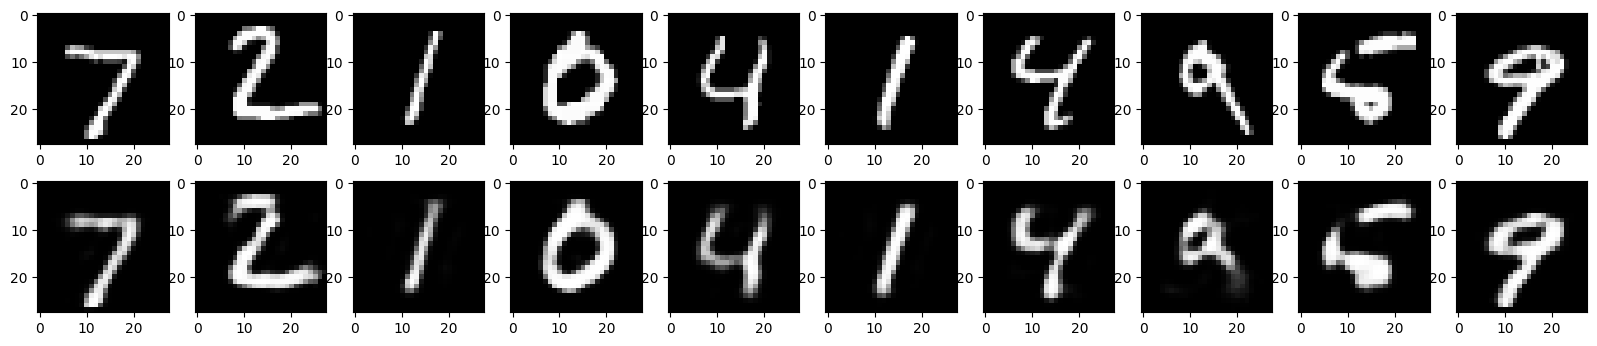

In [16]:
fig, axs = plt.subplots(2, 10, figsize=(20, 4))

for i in range(10):
    axs[0, i].imshow(x_test[i], cmap="gray")
    axs[1, i].imshow(pred_x[i], cmap="gray")

In [20]:
random_z = random.uniform(0, 10, (10, 32))
random_x = decoder.predict(random_z)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


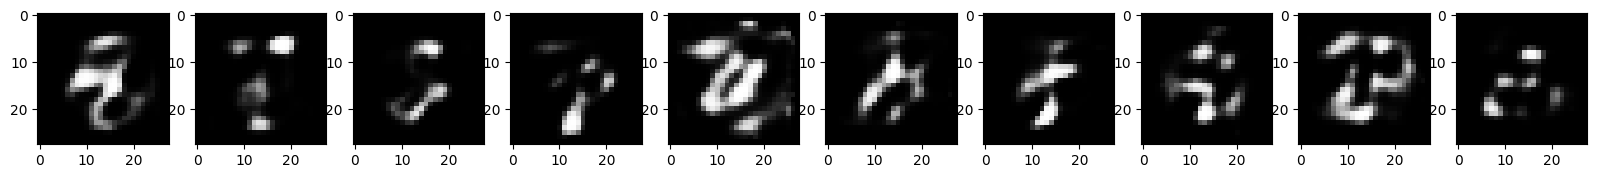

In [21]:
fig, axs = plt.subplots(1, 10, figsize=(20, 2))

for i in range(10):
    axs[i].imshow(random_x[i], cmap="gray")


In [22]:
noized_x = x_test + random.normal(0, 0.1, x_test.shape)
pred_noized_x = model.predict(noized_x)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step


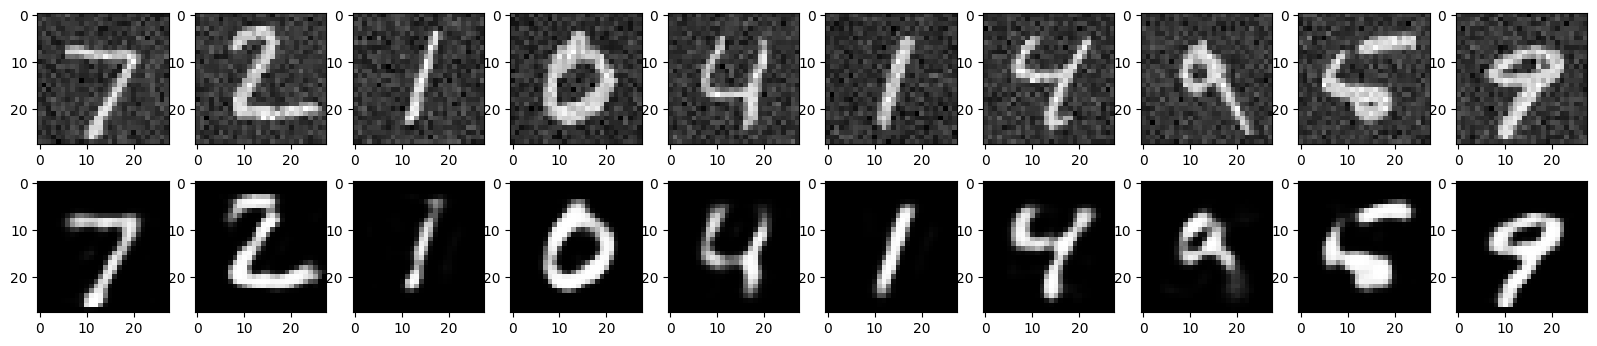

In [23]:
fig, axs = plt.subplots(2, 10, figsize=(20, 4))

for i in range(10):
    axs[0, i].imshow(noized_x[i], cmap="gray")
    axs[1, i].imshow(pred_noized_x[i], cmap="gray")

In [24]:
# ランダムな箇所が欠落
noized_x = x_test.copy()
noized_x[:, 15:20, 15:20] = 0
pred_noized_x = model.predict(noized_x)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step


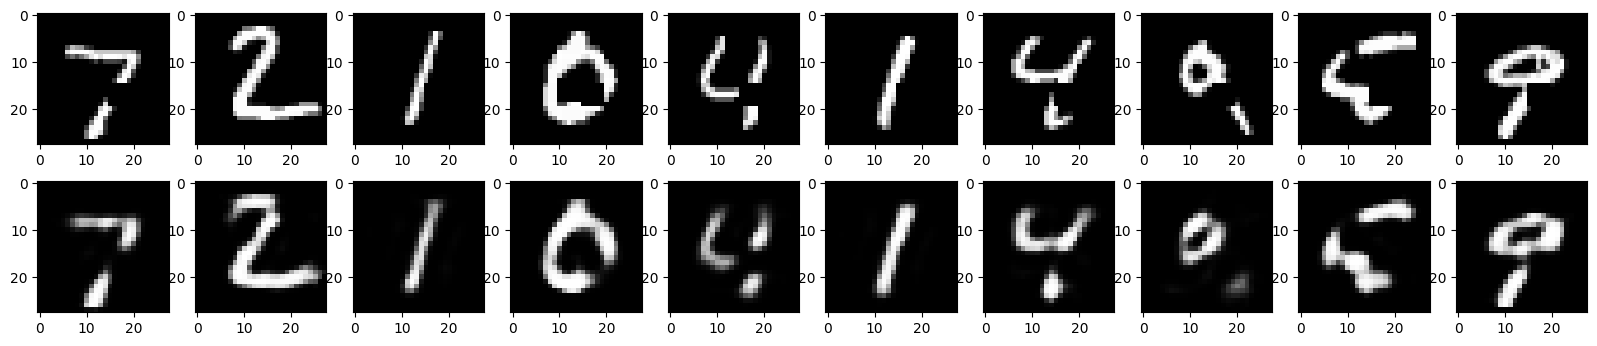

In [25]:
fig, axs = plt.subplots(2, 10, figsize=(20, 4))

for i in range(10):
    axs[0, i].imshow(noized_x[i], cmap="gray")
    axs[1, i].imshow(pred_noized_x[i], cmap="gray")